In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import main_reductions.main_correction_reduction_v1
# REVISIT: Do we want to keep this or add your own plotting logic

ModuleNotFoundError: No module named 'process_pdi_metadata'

In [2]:
# Helper plotting functions
def darken_colors(num_colors: int, darker_factor: float = 0.7) -> np.ndarray:
    """
    Darken a set of colors by reducing the value component in the HSV color space.
    """
    colors = plt.cm.jet(np.linspace(0, 1, num_colors))
    darker_colors = colors.copy()

    for i in range(num_colors):
        rgb = darker_colors[i, :3]
        hsv = plt.matplotlib.colors.rgb_to_hsv(rgb)
        hsv[2] *= darker_factor
        darker_colors[i, :3] = plt.matplotlib.colors.hsv_to_rgb(hsv)

    return darker_colors

def set_plot_style(axs, fonts: int, xlabel: str, ylabel: str):
    """Set standardized plot style properties."""
    axs.set_xlabel(xlabel, fontsize=fonts)
    axs.set_ylabel(ylabel, fontsize=fonts)
    axs.tick_params(axis='both', which='major', direction='out', length=4, width=1)
    axs.tick_params(which='minor', width=1, size=2)
    axs.set_facecolor('white')
    axs.spines['top'].set_linewidth(1)
    axs.spines['right'].set_linewidth(1)
    axs.spines['bottom'].set_linewidth(1)
    axs.spines['left'].set_linewidth(1)
    axs.tick_params(axis='x', labelsize=fonts)
    axs.tick_params(axis='y', labelsize=fonts)
    return axs

In [3]:
# Get plotting data from the correction pipeline
plotting_data = full_correction_integration(plotting=True, config_file_path="other_config.yml")

# print(f"Collected data for plotting:")
# print(f"  SAXS files: {len(plotting_data['saxs_data'])}")
# print(f"  WAXS files: {len(plotting_data['waxs_data'])}")
# print(f"  Metadata entries: {len(plotting_data['metadata']['filenames'])}")

full_correction_integration() called with plotting = True, config_file_path = other_config.yml
SWAXS Data Correction and 1D Integration Demo
Energy: 12 keV, Density: 0.92 g/cm³

Found 80 SAXS files and 80 WAXS files to process

Processing SAXS files...

Processing WAXS files...

Processing complete!


In [7]:
plotting_data['saxs_data'][0]

{'q': array([0.0308347 , 0.03366535, 0.03649601, 0.03932666, 0.04215731,
        0.04498797, 0.04781862, 0.05064927, 0.05347993, 0.05631058,
        0.05914123, 0.06197189, 0.06480254, 0.06763319, 0.07046385,
        0.0732945 , 0.07612515, 0.0789558 , 0.08178646, 0.08461711,
        0.08744776, 0.09027842, 0.09310907, 0.09593972, 0.09877038,
        0.10160103, 0.10443168, 0.10726234, 0.11009299, 0.11292364,
        0.11575429, 0.11858495, 0.1214156 , 0.12424625, 0.12707691,
        0.12990756, 0.13273821, 0.13556887, 0.13839952, 0.14123017,
        0.14406083, 0.14689148, 0.14972213, 0.15255279, 0.15538344,
        0.15821409, 0.16104474, 0.1638754 , 0.16670605, 0.1695367 ,
        0.17236736, 0.17519801, 0.17802866, 0.18085932, 0.18368997,
        0.18652062, 0.18935128, 0.19218193, 0.19501258, 0.19784323,
        0.20067389, 0.20350454, 0.20633519, 0.20916585, 0.2119965 ,
        0.21482715, 0.21765781, 0.22048846, 0.22331911, 0.22614977,
        0.22898042, 0.23181107, 0.23464173,

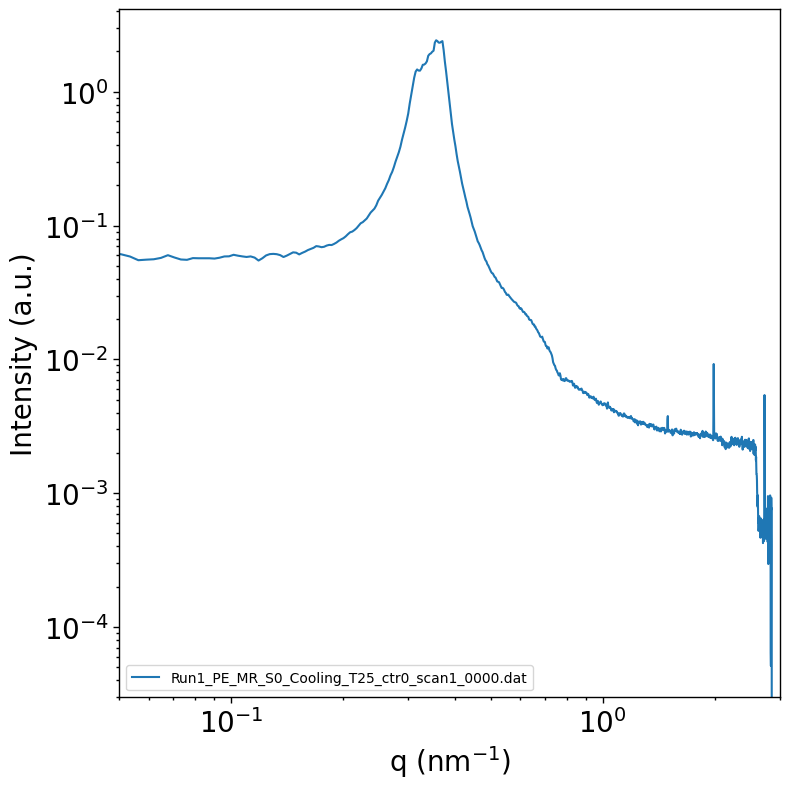

In [14]:
# Create SAXS intensity plot (similar to Step1 notebook)
fig, axs = plt.subplots(figsize=(8,8))

# Configuration: Set to True for all lines, False for single line (index 0)
plot_all_lines = False

if plot_all_lines:
    # Plot all lines
    num_colors = len(plotting_data['saxs_data'])
    darker_colors = darken_colors(num_colors, darker_factor=0.7)
    
    for i, saxs_data in enumerate(plotting_data['saxs_data']):
        q = saxs_data['q']
        intensity = saxs_data['intensity'] 
        filename = saxs_data['filename']
        
        axs.loglog(q, intensity, label=filename, color=darker_colors[i])
else:
    # Plot only the first element (index 0)
    saxs_data = plotting_data['saxs_data'][0]
    q = saxs_data['q']
    intensity = saxs_data['intensity'] 
    filename = saxs_data['filename']
    
    axs.loglog(q, intensity, label=filename)

axs.set_xlabel("q (nm$^{-1}$)")
axs.set_ylabel("Intensity (a.u.)")
axs.set_xlim([0.05, 3])
set_plot_style(axs, 20, 'q (nm$^{-1}$)', 'Intensity (a.u.)')
axs.legend(fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Create WAXS intensity plot (similar to Step1 notebook)
if plotting_data['waxs_data']:
    fig, axs = plt.subplots(figsize=(12,12))
    
    num_colors = len(plotting_data['waxs_data'])
    darker_colors = darken_colors(num_colors, darker_factor=0.7)
    
    for i, waxs_data in enumerate(plotting_data['waxs_data']):
        q = waxs_data['q']
        intensity = waxs_data['intensity']
        filename = waxs_data['filename']
        
        axs.plot(q, intensity, '-', label=filename, color=darker_colors[i])
    
    axs.set_xlabel("q (nm$^{-1}$)")
    axs.set_ylabel("Intensity (a.u.)")
    set_plot_style(axs, 20, 'q (nm$^{-1}$)', 'Intensity (a.u.)')
    axs.legend(fontsize=10)
    
    plt.tight_layout()
    plt.show()
else:
    print("No WAXS data available for plotting")

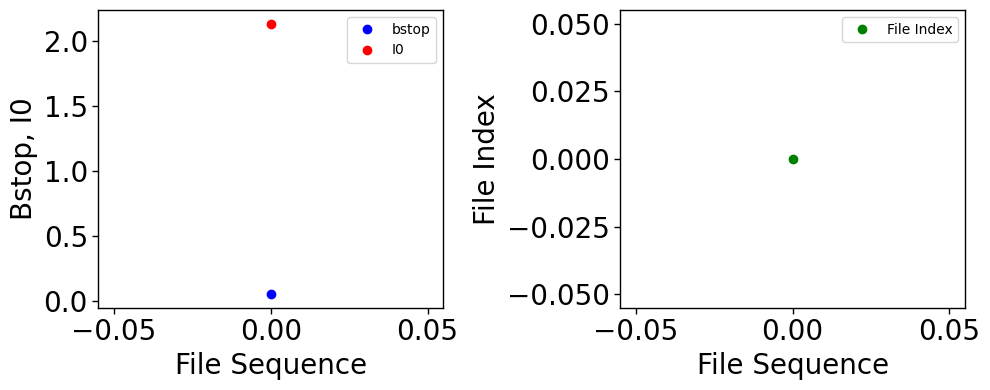

In [14]:
# Create monitoring plots (I0/Bstop vs time, Temperature vs time)
if plotting_data['metadata']['i0_values']:
    metadata = plotting_data['metadata']
    
    # For now, create simple sequential plots (would need actual timer data for time axis)
    # This matches the monitoring plots from Step1 notebook
    sequence = list(range(len(metadata['i0_values'])))
    
    fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(10, 4))
    
    # Plot I0 and Bstop values
    axs1.plot(sequence, metadata['bstop_values'], 'o', color='b', label='bstop')
    axs1.plot(sequence, metadata['i0_values'], 'o', color='r', label='I0')
    axs1.legend()
    axs1.set_xlabel('File Sequence')
    axs1.set_ylabel('Bstop and I0')
    set_plot_style(axs1, 20, 'File Sequence', 'Bstop, I0')
    
    # Temperature plot (if temperature data was available)
    # For now just show file sequence
    axs2.plot(sequence, sequence, 'o', color='g', label='File Index')
    axs2.legend()
    axs2.set_xlabel('File Sequence')
    axs2.set_ylabel('File Index')
    set_plot_style(axs2, 20, 'File Sequence', 'File Index')
    
    plt.tight_layout()
    plt.show()
else:
    print("No metadata available for monitoring plots")